In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(grid=False)

# set figure size
plt.rcParams["figure.figsize"] = (10,8)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
sea_df = pd.read_csv('sea_levels_2015.csv')
temp_df = pd.read_csv('GlobalTemperatures.csv')

In [3]:
sea_df.head()

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.00,24.20
1,1880-02-15,-171.10,24.20
2,1880-03-15,-164.30,24.20
3,1880-04-15,-158.20,24.20
4,1880-05-15,-158.70,24.20


In [4]:
 temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.03,3.57,nan,nan,nan,nan,nan,nan
1,1750-02-01,3.08,3.70,nan,nan,nan,nan,nan,nan
2,1750-03-01,5.63,3.08,nan,nan,nan,nan,nan,nan
3,1750-04-01,8.49,2.45,nan,nan,nan,nan,nan,nan
4,1750-05-01,11.57,2.07,nan,nan,nan,nan,nan,nan


In [5]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
temp_df = temp_df[['dt', 'LandAverageTemperature']]

In [7]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dt                      3192 non-null   object 
 1   LandAverageTemperature  3180 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.0+ KB


In [8]:
temp_df.dropna(inplace=True)

In [9]:
temp_df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.03
1,1750-02-01,3.08
2,1750-03-01,5.63
3,1750-04-01,8.49
4,1750-05-01,11.57


In [10]:
temp_df.dt = pd.to_datetime(temp_df.dt, format='%Y-%m-%d')
temp_df

,dt,LandAverageTemperature
0,1750-01-01,3.03
1,1750-02-01,3.08
2,1750-03-01,5.63
3,1750-04-01,8.49
4,1750-05-01,11.57
...,...,...
3187,2015-08-01,14.76
3188,2015-09-01,13.00
3189,2015-10-01,10.80
3190,2015-11-01,7.43


In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      3180 non-null   datetime64[ns]
 1   LandAverageTemperature  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 74.5 KB


In [12]:
temp = temp_df.set_index('dt').sort_index()
temp.head()

,LandAverageTemperature
dt,
1750-01-01,3.03
1750-02-01,3.08
1750-03-01,5.63
1750-04-01,8.49
1750-05-01,11.57


In [13]:
temp_yearly = temp.resample('Y').mean()
temp_yearly

,LandAverageTemperature
dt,
1750-12-31,8.72
1751-12-31,7.98
1752-12-31,5.78
1753-12-31,8.39
1754-12-31,8.47
...,...
2011-12-31,9.52
2012-12-31,9.51
2013-12-31,9.61


In [14]:
sea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB


In [15]:
sea_df.Time = pd.to_datetime(sea_df.Time, format='%Y-%m-%d')
sea = sea_df.set_index('Time').sort_index()
sea.head()

,GMSL,GMSL uncertainty
Time,,
1880-01-15,-183.00,24.20
1880-02-15,-171.10,24.20
1880-03-15,-164.30,24.20
1880-04-15,-158.20,24.20
1880-05-15,-158.70,24.20


In [16]:
sea.drop(columns='GMSL uncertainty', inplace=True)
sea.head()

,GMSL
Time,
1880-01-15,-183.00
1880-02-15,-171.10
1880-03-15,-164.30
1880-04-15,-158.20
1880-05-15,-158.70


In [17]:
sea.tail()

,GMSL
Time,
2013-08-15,71.60
2013-09-15,68.80
2013-10-15,66.40
2013-11-15,59.70
2013-12-15,58.50


In [18]:
sea_yearly = sea.resample('Y').mean()
sea_yearly

,GMSL
Time,
1880-12-31,-158.73
1881-12-31,-153.06
1882-12-31,-169.88
1883-12-31,-164.59
1884-12-31,-143.75
...,...
2009-12-31,58.02
2010-12-31,65.75
2011-12-31,67.30


In [19]:
merged_df = temp_yearly.join(sea_yearly).dropna()

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 1880-12-31 to 2013-12-31
Freq: A-DEC
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LandAverageTemperature  134 non-null    float64
 1   GMSL                    134 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


array([[<AxesSubplot:title={'center':'LandAverageTemperature'}>,
        <AxesSubplot:title={'center':'GMSL'}>]], dtype=object)

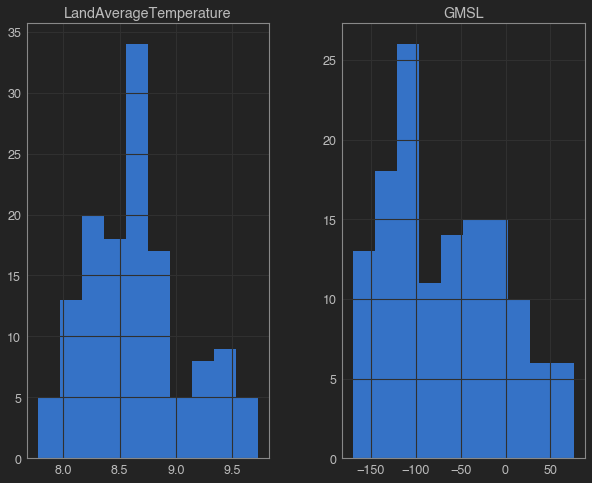

In [21]:
merged_df.hist()

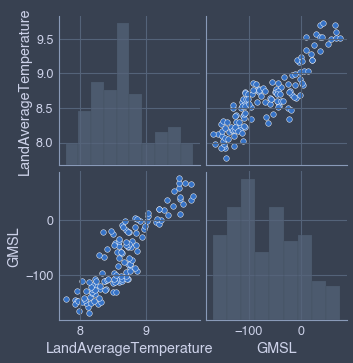

In [22]:
jtplot.style(theme='oceans16')
sns.pairplot(merged_df)

In [23]:
merged_df['year'] = merged_df.index.year

<AxesSubplot:xlabel='year', ylabel='LandAverageTemperature'>

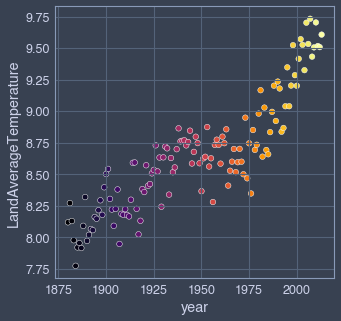

In [24]:
jtplot.style(theme='oceans16', grid=True)
plt.figure(figsize=(5,5))
sns.scatterplot(data = merged_df, x='year', y='LandAverageTemperature', hue='year',palette='inferno',legend=False)

<AxesSubplot:xlabel='year', ylabel='GMSL'>

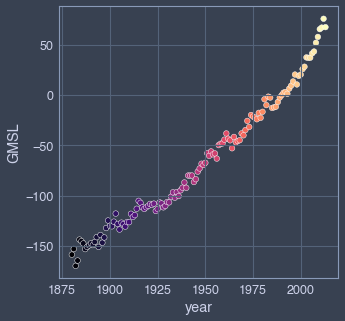

In [25]:
jtplot.style(theme='oceans16',)
plt.figure(figsize=(5,5))
sns.scatterplot(data = merged_df, x='year', y='GMSL', hue='year',palette='magma',legend=False)

<AxesSubplot:xlabel='LandAverageTemperature', ylabel='GMSL'>

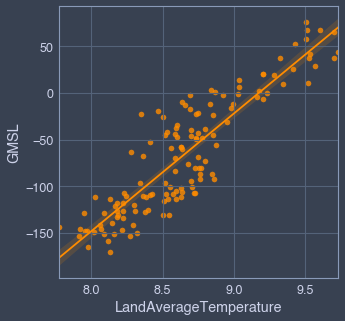

In [26]:
jtplot.style(theme='oceans16')
plt.figure(figsize=(5,5))
sns.regplot(data=merged_df, x='LandAverageTemperature', y='GMSL',color='darkorange')

### Is there a correlation between land average temperature and average sea level?

In [27]:
null_hypothesis = "There is no correlation between land average temperature and average sea level"
alternative_hypothesis = "There is a positive correlation between land average temperature and average sea level"
confidence_level = .95
a = 1 - confidence_level

In [28]:
from sklearn.model_selection import train_test_split
def split(df, stratify_by=None):
    """
    train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate[stratify_by])
    
    return train, validate, test

In [29]:
train, validate, test = split(merged_df)

In [30]:
#Pearson correlation test between two continuous variables
from scipy import stats
r, p = stats.pearsonr(train.LandAverageTemperature, train.GMSL)
r, p

(0.884986206497071, 5.802967138594784e-32)

In [31]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")
    
print('Pearson correlation = ', r)
print('There is a moderate-strong positive correlation between land average temperature and average sea level')

We reject the null
Pearson correlation =  0.884986206497071
There is a moderate-strong positive correlation between land average temperature and average sea level


In [32]:
X_train_mvp = train[['LandAverageTemperature']]
y_train_mvp = train[['GMSL']]

X_validate_mvp = validate[['LandAverageTemperature']]
y_validate_mvp = validate[['GMSL']]

X_test_mvp = test[['LandAverageTemperature']]
y_test_mvp = test[['GMSL']]

In [33]:
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression

def scale_data(train,validate,test):
    '''Accepts train, validate, test data frames and applies min-max scaler
    return: train, validate, test scaled pandas dataframe'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [34]:
# scaling data
X_train_scaled_mvp, X_validate_scaled_mvp, X_test_scaled_mvp = scale_data(X_train_mvp, X_validate_mvp, X_test_mvp)

In [35]:
# 1. Predict pred_mean
sl_pred_mean = y_train_mvp.GMSL.mean()
y_train_mvp['sl_pred_mean'] = sl_pred_mean
y_validate_mvp['sl_pred_mean'] = sl_pred_mean

# 2. compute pred_median
sl_pred_median = y_train_mvp.GMSL.median()
y_train_mvp['sl_pred_median'] = sl_pred_median
y_validate_mvp['sl_pred_median'] = sl_pred_median

<ipython-input-35-a844353729f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_mvp['sl_pred_mean'] = sl_pred_mean
<ipython-input-35-a844353729f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate_mvp['sl_pred_mean'] = sl_pred_mean


In [36]:
y_train_mvp.head()

,GMSL,sl_pred_mean,sl_pred_median
dt,,,
1980-12-31,-16.53,-63.56,-68.22
1954-12-31,-58.93,-63.56,-68.22
1982-12-31,-9.86,-63.56,-68.22
1945-12-31,-83.63,-63.56,-68.22
1901-12-31,-130.53,-63.56,-68.22


In [37]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression

# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train_mvp.GMSL, y_train_mvp.sl_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train_mvp.GMSL, y_train_mvp.sl_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  62.99 
Validate/Out-of-Sample:  62.19
RMSE using Median
Train/In-Sample:  63.16 
Validate/Out-of-Sample:  61.75


In [38]:
lm = LinearRegression(normalize=False)

lm.fit(X_train_scaled_mvp, y_train_mvp.GMSL)

y_train_mvp['sl_pred_lm'] = lm.predict(X_train_scaled_mvp)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.GMSL, y_train_mvp.sl_pred_lm) ** (1/2)

# predict validate
y_validate_mvp['sl_pred_lm'] = lm.predict(X_validate_scaled_mvp)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  29.329404340956227 
Validation/Out-of-Sample:  26.144327076934754


In [39]:
# R2 for train
explained_variance_score(y_train_mvp.GMSL, y_train_mvp.sl_pred_lm)

0.7832005856900769

In [40]:
# R2 for validate
explained_variance_score(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_lm)

0.8202222311587224

In [41]:
import xgboost as xgb

In [42]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 4, alpha = 1, n_estimators = 150, subsample = 0.4)

In [43]:
xg_reg.fit(X_train_scaled_mvp, y_train_mvp.GMSL)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
#predict train
y_train_mvp['sl_pred_xgb'] = xg_reg.predict(X_train_scaled_mvp)

# evaluate: rmse
rmse_train = mean_squared_error(y_train_mvp.GMSL, y_train_mvp.sl_pred_xgb) ** (1/2)

# predict validate
y_validate_mvp['sl_pred_xgb'] = xg_reg.predict(X_validate_scaled_mvp)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_xgb) ** (1/2)

print("RMSE for XGB\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for XGB
Training/In-Sample:  13.661843566254946 
Validation/Out-of-Sample:  24.247841230352787


In [45]:
# R2 for train and validate respectively
explained_variance_score(y_train_mvp.GMSL, y_train_mvp.sl_pred_xgb), explained_variance_score(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_xgb)

(0.9529828002581743, 0.8455171096662268)

In [46]:
xg_reg.score(X_train_scaled_mvp,y_train_mvp.GMSL)

0.9529596834883991

In [47]:
# score function
xg_reg.score(X_test_scaled_mvp,y_test_mvp.GMSL)

0.8575352999409935

In [48]:
X_train_scaled_mvp

,LandAverageTemperature
0,0.59
1,0.36
2,0.40
3,0.37
4,0.35
...,...
88,0.21
89,0.43
90,0.42
91,0.89


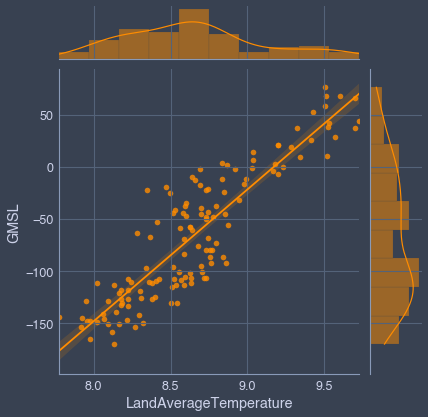

In [49]:
sns.jointplot(data=merged_df, x='LandAverageTemperature',y='GMSL', kind='reg', color='darkorange')

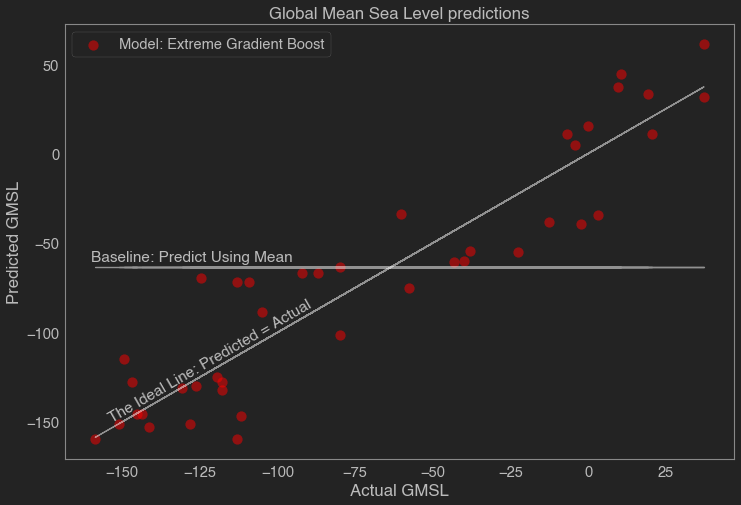

In [50]:
jtplot.style(grid='False', fscale=1.4)
plt.figure(figsize=(12,8))
plt.plot(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_mean, alpha=.5, color="white", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (-160, -60))
plt.plot(y_validate_mvp.GMSL, y_validate_mvp.GMSL, alpha=.5, color="white", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (-155, -150), rotation=30)

plt.scatter(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_xgb, 
            alpha=.5, color="red", s=100, label="Model: Extreme Gradient Boost")

plt.legend()
plt.xlabel("Actual GMSL")
plt.ylabel("Predicted GMSL")
plt.title("Global Mean Sea Level predictions")

plt.show()

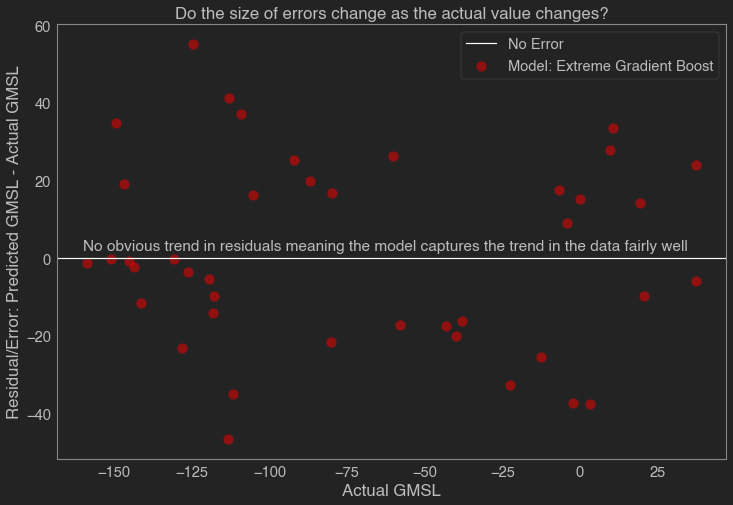

In [52]:
plt.figure(figsize=(12,8))
plt.axhline(label="No Error")
plt.scatter(y_validate_mvp.GMSL, y_validate_mvp.sl_pred_xgb-y_validate_mvp.GMSL, 
            alpha=.5, color="red", s=100, label="Model: Extreme Gradient Boost")

plt.legend()
plt.xlabel("Actual GMSL")
plt.ylabel("Residual/Error: Predicted GMSL - Actual GMSL")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("No obvious trend in residuals meaning the model captures the trend in the data fairly well", (-160.0, 2))

plt.show()